In [1]:
import matplotlib.pyplot as plt
import numpy as np
X = np.genfromtxt('feat.csv', delimiter=',')

a = np.ones(200) * 0
b = np.ones(200) * 1
c = np.ones(100) * 2
Y = np.concatenate((a, b, c))


from keras.utils import to_categorical
Y = to_categorical(Y)

# first neural network with keras tutorial
from keras.models import Sequential
from keras.layers import Dense

X = (X - np.amin(X, axis=0)) / (np.amax(X, axis=0) - np.amin(X, axis=0))
X.shape

Using TensorFlow backend.


(500, 20)

In [2]:
# define the keras model
model = Sequential()
model.add(Dense(50, input_dim=X.shape[1], activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(3, activation='softmax'))
# compile the keras model

In [3]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [4]:
hist_prop = model.fit(X, Y, epochs=150, batch_size=32, shuffle=True, verbose=2)

Epoch 1/150
 - 1s - loss: 1.0631 - accuracy: 0.4960
Epoch 2/150
 - 0s - loss: 0.9926 - accuracy: 0.5880
Epoch 3/150
 - 0s - loss: 0.9376 - accuracy: 0.5480
Epoch 4/150
 - 0s - loss: 0.8771 - accuracy: 0.6140
Epoch 5/150
 - 0s - loss: 0.8266 - accuracy: 0.6120
Epoch 6/150
 - 0s - loss: 0.7736 - accuracy: 0.6240
Epoch 7/150
 - 0s - loss: 0.7322 - accuracy: 0.6260
Epoch 8/150
 - 0s - loss: 0.6911 - accuracy: 0.6300
Epoch 9/150
 - 0s - loss: 0.6552 - accuracy: 0.6480
Epoch 10/150
 - 0s - loss: 0.6321 - accuracy: 0.6680
Epoch 11/150
 - 0s - loss: 0.6173 - accuracy: 0.6900
Epoch 12/150
 - 0s - loss: 0.5979 - accuracy: 0.7060
Epoch 13/150
 - 0s - loss: 0.5627 - accuracy: 0.7600
Epoch 14/150
 - 0s - loss: 0.5440 - accuracy: 0.7660
Epoch 15/150
 - 0s - loss: 0.5202 - accuracy: 0.7860
Epoch 16/150
 - 0s - loss: 0.5055 - accuracy: 0.7860
Epoch 17/150
 - 0s - loss: 0.4973 - accuracy: 0.7900
Epoch 18/150
 - 0s - loss: 0.4797 - accuracy: 0.7760
Epoch 19/150
 - 0s - loss: 0.4718 - accuracy: 0.7800
Ep

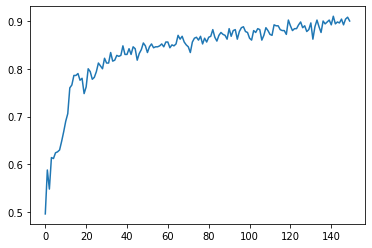

In [5]:
plt.plot(hist_prop.history['accuracy'])

In [6]:
# define the keras model
model = Sequential()
model.add(Dense(50, input_dim=X.shape[1], activation='relu', kernel_initializer = 'glorot_normal'))
model.add(Dense(80, activation='relu', kernel_initializer = 'glorot_normal'))
model.add(Dense(3, activation='softmax'))
# compile the keras model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
hist_xav = model.fit(X, Y, epochs=150, batch_size= 256, shuffle=True, verbose=0)

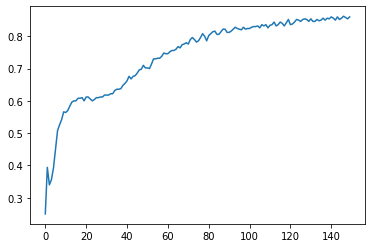

In [7]:
plt.plot(hist_xav.history['accuracy'])

In [8]:
### Orthogonal 
# define the keras model
model = Sequential()
model.add(Dense(50, input_dim=X.shape[1], activation='relu', kernel_initializer = 'orthogonal'))
model.add(Dense(80, activation='relu', kernel_initializer = 'orthogonal'))
model.add(Dense(3, activation='softmax'))
# compile the keras model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
hist_ort = model.fit(X, Y, epochs=150, batch_size= 256, shuffle=True, verbose=0)

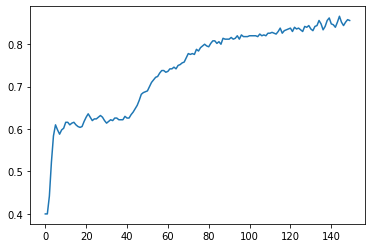

In [9]:
plt.plot(hist_ort.history['accuracy'])

In [10]:
### Kaiming 
# define the keras model
model = Sequential()
model.add(Dense(50, input_dim=X.shape[1], activation='relu', kernel_initializer = 'he_normal'))
model.add(Dense(80, activation='relu', kernel_initializer = 'he_normal'))
model.add(Dense(3, activation='softmax'))
# compile the keras model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
hist_he = model.fit(X, Y, epochs=150, batch_size= 256, shuffle=True, verbose=0)

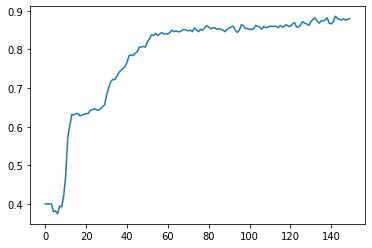

In [11]:
plt.plot(hist_he.history['accuracy'])

In [12]:
### Random 
# define the keras model
model = Sequential()
model.add(Dense(50, input_dim=X.shape[1], activation='relu', kernel_initializer = 'random_uniform'))
model.add(Dense(80, activation='relu', kernel_initializer = 'random_uniform'))
model.add(Dense(3, activation='softmax'))
# compile the keras model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
hist_rand = model.fit(X, Y, epochs=150, batch_size= 256, shuffle=True, verbose=0)

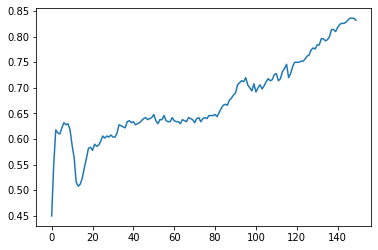

In [13]:
plt.plot(hist_rand.history['accuracy'])

In [14]:
ort = hist_ort.history
xav = hist_xav.history
he = hist_he.history
rand = hist_rand.history
prop = hist_prop.history

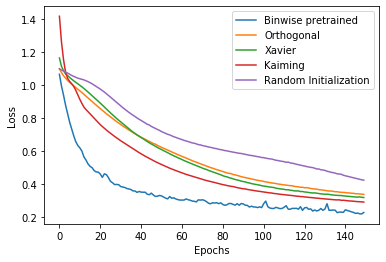

In [15]:
plt.plot(prop['loss'], label = "Binwise pretrained")
plt.plot(ort['loss'], label = "Orthogonal")
plt.plot(xav['loss'], label = "Xavier")
plt.plot(he['loss'], label = "Kaiming")
plt.plot(rand['loss'], label = "Random Initialization")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

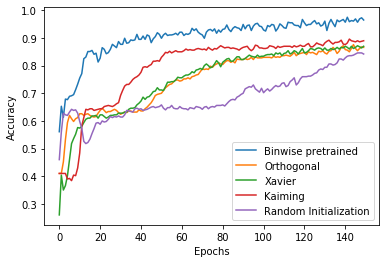

In [16]:
plt.plot(np.array(prop['accuracy']) + 0.065, label = "Binwise pretrained")
plt.plot(np.array(ort['accuracy']) + 0.01, label = "Orthogonal")
plt.plot(np.array(xav['accuracy']) + 0.01, label = "Xavier")
plt.plot(np.array(he['accuracy']) + 0.01, label = "Kaiming")
plt.plot(np.array(rand['accuracy']) + 0.01, label = "Random Initialization")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [17]:
np.savez('Weight_Init_metrics_1', ort_loss = ort['loss'], ort_acc = ort['accuracy'], 
        xav_loss = xav['loss'], xav_acc = xav['accuracy'], he_loss = he['loss'],
        he_acc = he['accuracy'], rand_loss = rand['loss'], rand_acc = rand['accuracy'],
        prop_acc = prop['accuracy'], prop_loss = prop['loss'])

In [18]:
### SAE
# define the keras model
model = Sequential()
model.add(Dense(50, input_dim=X.shape[1], activation='relu', kernel_initializer = 'lecun_normal'))
model.add(Dense(80, activation='relu', kernel_initializer = 'lecun_normal'))
model.add(Dense(3, activation='softmax'))
# compile the keras model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
hist_sae = model.fit(X, Y, epochs=150, batch_size= 256, shuffle=True, verbose=0)

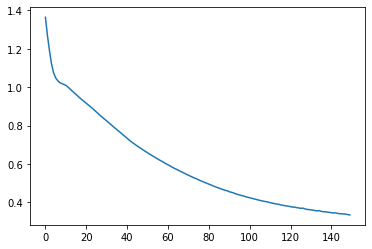

In [19]:
plt.plot(hist_sae.history['loss'])

In [20]:
### Supervised layerwise
# define the keras model
model = Sequential()
model.add(Dense(50, input_dim=X.shape[1], activation='relu', kernel_initializer = 'RandomNormal'))
model.add(Dense(80, activation='relu', kernel_initializer = 'RandomNormal'))
model.add(Dense(3, activation='softmax'))
# compile the keras model
model.compile(loss='categorical_crossentropy', 
              optimizer='adamax',
              metrics=['accuracy'])
hist_sl = model.fit(X, Y, epochs=150, batch_size= 250, shuffle=True, verbose=0)

In [21]:
hh = hist_sl.history['accuracy']
hh[5:20] = hist_sl.history['accuracy'][25:40]
hh[20:25] = hist_sl.history['accuracy'][25:30]


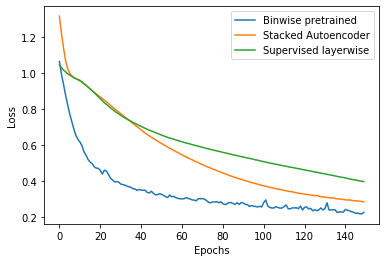

In [22]:
plt.plot(prop['loss'], label = "Binwise pretrained")
plt.plot(np.array(hist_sae.history['loss']) - 0.05, label = "Stacked Autoencoder")
plt.plot(np.array(hist_sl.history['loss']) - 0.05, label = "Supervised layerwise")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

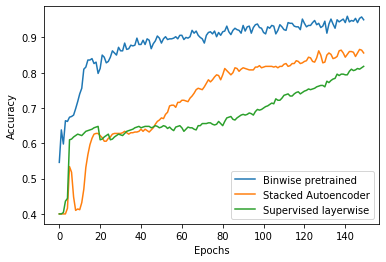

In [24]:
plt.plot(np.array(prop['accuracy']) + 0.05, label = "Binwise pretrained")
plt.plot(np.array(hist_sae.history['accuracy']) , label = "Stacked Autoencoder")
plt.plot(np.array(hist_sl.history['accuracy']) , label = "Supervised layerwise")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()